In [1]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy import stats

# Loading the libraries

In [2]:
# Loading the data
data = pd.read_excel('dataset_lfs_2024.xlsx')

In [3]:
data.dropna(subset=["HRLYEARN"],inplace=True)
# Removing the null values in HRLYEARN column

In [4]:
data=data[data['MJH']==1]
#filter for single job holders

In [5]:
data=data[data['SCHOOLN']==1]
#only looking at non students and not full time or part time students

In [6]:
data=data[data['FTPTMAIN']==1]
# Only looking at full time workers

In [7]:
data=data[data['PERMTEMP']==1]
# Only looking at those with permanent positions

In [8]:
data['HRLYEARN']=data['HRLYEARN']/100
# The data dictionary for this dataset indicated that the last 2 values of this numeric column were the decimal points. So dividing the HRLYEARN column by 100 will add 2 decimal points. 

In [9]:
data['UHRSMAIN']=data['UHRSMAIN']/100
# The data dictionary for this dataset indicated that the last 2 values of this numeric column were the decimal points. So dividing the UHRSMAIN column by 100 will add 2 decimal points. 

In [10]:
#profile = ProfileReport(data, title="Profiling Report")
#profile.to_file("EDA after eliminating blanks of Usual Hourly Wages (HRLYEARN).html")
# Generating the profiling report after removing the null values in HRLYEARN column

In [11]:
full_variable_name_mapping={
'rec_num':'Order of record in file',
'survyear':'Survey year',
'survmnth':'Survey month',
'lfsstat':'Labour force status',
'prov':'Province',
'cma':'Nine largest CMAs',
'age_12':'Five-year age group of respondent',
'age_6':'Age in 2 and 3 year groups, 15 to 29',
'sex':'Sex of respondent',
'marstat':'Marital status of respondent',
'educ':'Highest educational attainment',
'mjh':'Single or multiple jobholder',
'everwork':'Identifies if a person has worked in the last year',
'ftptlast':'Full- or part-time status of last job',
'cowmain':'Class of worker, main job',
'immig':'Immigrant status',
'naics_21':'Industry of main job',
'noc_10':'Occupation at main job (noc_10)',
'noc_43':'Occupation at main job (noc_43)',
'yabsent':'Reason of absence, full week',
'wksaway':'Number of weeks absent from work',
'payaway':'Paid for time off, full-week absence only',
'uhrsmain':'Usual hours worked per week at main job',
'ahrsmain':'Actual hours worked per week at main job',
'ftptmain':'Full- or part-time status at main or only job',
'utothrs':'Usual hours worked per week at all jobs',
'atothrs':'Actual hours worked per week at all jobs',
'hrsaway':'Hours away from work, part-week absence only',
'yaway':'Reason for part-week absence',
'paidot':'Paid overtime hours in reference week',
'unpaidot':'Unpaid overtime hours in reference week',
'xtrahrs':'Number of overtime or extra hours worked',
'whypt':'Reason for part-time work',
'tenure':'Job tenure with current employer',
'prevten':'Job tenure with previous employer',
'hrlyearn':'Usual hourly wages',
'union':'Union status',
'permtemp':'Job permanency',
'estsize':'Establishment size',
'firmsize':'Firm size',
'durunemp':'Duration of unemployment',
'flowunem':'Flows into unemployment',
'unemftpt':'Job seekers by type of work sought and temporary layoffs by work status of last job',
'whylefto':'Reason for leaving job during previous year (whylefto)',
'whyleftn':'Reason for leaving job during previous year (whyleftn)',
'durjless':'Duration of joblessness',
'availabl':'Availability during the reference week',
'lkpubag':'Unemployed, used public employment agency',
'lkemploy':'Unemployed, checked with employers directly',
'lkrels':'Unemployed, checked with friends or relatives',
'lkatads':'Unemployed, looked at job ads',
'lkansads':'Unemployed, placed or answered ads',
'lkothern':'Unemployed, other methods',
'prioract':'Main activity before started looking for work',
'ynolook':'Reason for not looking for work during the reference week',
'tlolook':'Temporary layoff, looked for work during the last four weeks',
'schooln':'Current student status',
'efamtype':'Type of economic family',
'agyownk':'Age of youngest child',
'finalwt':'Standard final weight'}

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Displaying all the columns and rows

data.describe()
# Displaying the summary statistics of the data

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,EDUC,MJH,EVERWORK,FTPTLAST,COWMAIN,IMMIG,NAICS_21,NOC_10,NOC_43,YABSENT,WKSAWAY,PAYAWAY,UHRSMAIN,AHRSMAIN,FTPTMAIN,UTOTHRS,ATOTHRS,HRSAWAY,YAWAY,PAIDOT,UNPAIDOT,XTRAHRS,WHYPT,TENURE,PREVTEN,HRLYEARN,UNION,PERMTEMP,ESTSIZE,FIRMSIZE,DURUNEMP,FLOWUNEM,UNEMFTPT,WHYLEFTO,WHYLEFTN,DURJLESS,AVAILABL,LKPUBAG,LKEMPLOY,LKRELS,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
count,155250.000000,155250.0,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,24774.000000,155250.000000,155250.000000,155250.000000,155250.0,0.0,0.0,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,12117.000000,12117.000000,12117.000000,155250.000000,155250.000000,155250.0,155250.000000,155250.000000,143133.000000,20286.000000,143133.000000,143133.000000,143133.000000,0.0,155250.000000,0.0,155250.000000,155250.000000,155250.0,155250.000000,155250.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155250.0,155250.000000,67144.000000,155250.000000
mean,55302.464612,2024.0,2.511253,1.078048,34.541089,1.787034,6.114628,4.828812,1.467936,2.652676,3.964940,1.0,NaN,NaN,1.720006,2.686158,12.977153,4.942596,21.365308,1.865808,17.331848,1.475283,3.937985,362.173623,1.0,393.798467,362.205217,15.429021,1.773292,8.890507,7.555889,16.446396,NaN,100.132335,NaN,37.209966,2.333688,1.0,2.302821,3.073894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.832064,2.202118,315.259156
std,31965.500596,0.0,1.118995,0.268248,14.358146,2.797997,2.350304,1.202854,0.498972,2.111919,1.382313,0.0,NaN,NaN,0.448997,0.613119,5.008835,2.748704,13.009996,0.962906,24.744883,0.499409,0.579008,134.637618,0.0,57.900774,134.670557,48.317799,1.040619,36.968498,30.450366,47.076726,NaN,82.954092,NaN,18.554476,0.932136,0.0,1.053113,1.124185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.946202,1.076246,289.202744
min,2.000000,2024.0,1.000000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,0.000000,1.0,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,5.770000,1.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,1.000000
25%,27596.250000,2024.0,2.000000,1.000000,24.000000,0.000000,4.000000,4.000000,1.000000,1.000000,4.000000,1.0,NaN,NaN,1.000000,3.000000,9.000000,2.000000,9.000000,1.000000,1.000000,1.000000,3.750000,350.000000,1.0,375.000000,350.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,26.000000,NaN,24.000000,1.000000,1.0,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,1.000000,137.000000
50%,55279.500000,2024.0,3.000000,1.000000,35.000000,0.000000,6.000000,5.000000,1.000000,1.000000,4.000000,1.0,NaN,NaN,2.000000,3.000000,14.000000,5.000000,20.000000,2.000000,4.000000,1.000000,4.000000,400.000000,1.0,400.000000,400.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,73.000000,NaN,32.790000,3.000000,1.0,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.000000,2.000000,220.000000
75%,83006.000000,2024.0,4.000000,1.000000,47.000000,4.000000,8.000000,6.000000,2.000000,5.000000,5.000000,1.0,NaN,NaN,2.000000,3.000000,17.000000,7.000000,34.000000,3.000000,25.000000,2.000000,4.000000,400.000000,1.0,400.000000,400.000000,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,171.000000,NaN,46.150000,3.000000,1.0,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.000000,3.000000,370.000000
max,112082.000000,2024.0,4.000000,2.000000,59.000000,9.000000,10.000000,6.000000,2.000000,6.000000,6.000000,1.0,NaN,NaN,2.000000,3.000000,21.000000,10.000000,43.000000,3.000000,99.000000,2.000000,9.900000,990.000000,1.0,990.000000,990.000000,990.000000,4.000000,800.000000,980.000000,980.0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155250 entries, 4 to 442573
Data columns (total 60 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   REC_NUM   155250 non-null  int64  
 1   SURVYEAR  155250 non-null  int64  
 2   SURVMNTH  155250 non-null  int64  
 3   LFSSTAT   155250 non-null  int64  
 4   PROV      155250 non-null  int64  
 5   CMA       155250 non-null  int64  
 6   AGE_12    155250 non-null  int64  
 7   AGE_6     24774 non-null   float64
 8   SEX       155250 non-null  int64  
 9   MARSTAT   155250 non-null  int64  
 10  EDUC      155250 non-null  int64  
 11  MJH       155250 non-null  float64
 12  EVERWORK  0 non-null       float64
 13  FTPTLAST  0 non-null       float64
 14  COWMAIN   155250 non-null  float64
 15  IMMIG     155250 non-null  int64  
 16  NAICS_21  155250 non-null  float64
 17  NOC_10    155250 non-null  float64
 18  NOC_43    155250 non-null  float64
 19  YABSENT   12117 non-null   float64
 20  WKSA

In [14]:
# Missing values
data_missing_values= data.isnull().sum()
pd.DataFrame(data_missing_values, columns=['Missing Values'])
#percentage of missing values
data_percent_missing = round(data.isnull().sum() * 100 / len(data),2)
missing_values_percent=pd.DataFrame(data_percent_missing, columns=['Missing Values %'])
missing_values_percent=missing_values_percent.rename_axis('Variables')
missing_values_percent

,Missing Values %
Variables,
REC_NUM,0.00
SURVYEAR,0.00
SURVMNTH,0.00
LFSSTAT,0.00
PROV,0.00
CMA,0.00
AGE_12,0.00
AGE_6,84.04
SEX,0.00


In [15]:
data.head()

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,EDUC,MJH,EVERWORK,FTPTLAST,COWMAIN,IMMIG,NAICS_21,NOC_10,NOC_43,YABSENT,WKSAWAY,PAYAWAY,UHRSMAIN,AHRSMAIN,FTPTMAIN,UTOTHRS,ATOTHRS,HRSAWAY,YAWAY,PAIDOT,UNPAIDOT,XTRAHRS,WHYPT,TENURE,PREVTEN,HRLYEARN,UNION,PERMTEMP,ESTSIZE,FIRMSIZE,DURUNEMP,FLOWUNEM,UNEMFTPT,WHYLEFTO,WHYLEFTN,DURJLESS,AVAILABL,LKPUBAG,LKEMPLOY,LKRELS,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
4,5,2024,1,1,35,0,6,NaN,1,1,4,1.0,NaN,NaN,2.0,3,6.0,8.0,35.0,NaN,NaN,NaN,4.50,420.0,1.0,450.0,420.0,0.0,NaN,0.0,0.0,0.0,NaN,212.0,NaN,28.00,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,2.0,231
6,7,2024,1,1,24,2,10,NaN,1,5,6,1.0,NaN,NaN,2.0,3,14.0,3.0,13.0,NaN,NaN,NaN,3.75,375.0,1.0,375.0,375.0,0.0,NaN,0.0,0.0,0.0,NaN,240.0,NaN,24.74,3.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,159
7,8,2024,1,1,59,0,3,6.0,1,2,4,1.0,NaN,NaN,2.0,3,6.0,8.0,35.0,NaN,NaN,NaN,4.00,840.0,1.0,400.0,840.0,0.0,NaN,440.0,0.0,440.0,NaN,17.0,NaN,40.00,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,131
10,11,2024,1,1,59,0,10,NaN,1,1,4,1.0,NaN,NaN,1.0,3,16.0,3.0,13.0,NaN,NaN,NaN,3.50,200.0,1.0,350.0,200.0,150.0,0.0,0.0,0.0,0.0,NaN,240.0,NaN,36.33,1.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,299
11,12,2024,1,2,24,0,4,NaN,2,1,4,1.0,NaN,NaN,2.0,3,7.0,1.0,4.0,0.0,3.0,2.0,4.00,0.0,1.0,400.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,34.75,3.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,390


In [352]:
data_type_mapping={
'rec_num':'Nominal',
'survyear':'Ordinal',
'survmnth':'Ordinal',
'lfsstat':'Nominal',
'prov':'Nominal',
'cma':'Nominal',
'age_12':'Ordinal',
'age_6':'Ordinal',
'sex':'Nominal',
'marstat':'Nominal',
'educ':'Ordinal',
'mjh':'Nominal',
'everwork':'Nominal',
'ftptlast':'Nominal',
'cowmain':'Nominal',
'immig':'Nominal',
'naics_21':'Nominal',
'noc_10':'Nominal',
'noc_43':'Nominal',
'yabsent':'Nominal',
'wksaway':'Nominal',
'payaway':'Nominal',
'uhrsmain':'Continuous',
'ahrsmain':'Continuous',
'ftptmain':'Nominal',
'utothrs':'Continuous',
'atothrs':'Continuous',
'hrsaway':'Continuous',
'yaway':'Nominal',
'paidot':'Continuous',
'unpaidot':'Continuous',
'xtrahrs':'Continuous',
'whypt':'Nominal',
'tenure':'Discrete',
'prevten':'Discrete',
'hrlyearn':'Continuous',
'union':'Nominal',
'permtemp':'Nominal',
'estsize':'Ordinal',
'firmsize':'Ordinal',
'durunemp':'Discrete',
'flowunem':'Nominal',
'unemftpt':'Nominal',
'whylefto':'Nominal',
'whyleftn':'Nominal',
'durjless':'Discrete',
'availabl':'Nominal',
'lkpubag':'Nominal',
'lkemploy':'Nominal',
'lkrels':'Nominal',
'lkatads':'Nominal',
'lkansads':'Nominal',
'lkothern':'Nominal',
'prioract':'Nominal',
'ynolook':'Nominal',
'tlolook':'Nominal',
'schooln':'Nominal',
'efamtype':'Nominal',
'agyownk':'Ordinal',
'finalwt':'Continuous'}

data_object_mapping={
'rec_num':'Qualitative',
'survyear':'Qualitative',
'survmnth':'Qualitative',
'lfsstat':'Qualitative',
'prov':'Qualitative',
'cma':'Qualitative',
'age_12':'Qualitative',
'age_6':'Qualitative',
'sex':'Qualitative',
'marstat':'Qualitative',
'educ':'Qualitative',
'mjh':'Qualitative',
'everwork':'Qualitative',
'ftptlast':'Qualitative',
'cowmain':'Qualitative',
'immig':'Qualitative',
'naics_21':'Qualitative',
'noc_10':'Qualitative',
'noc_43':'Qualitative',
'yabsent':'Qualitative',
'wksaway':'Qualitative',
'payaway':'Qualitative',
'uhrsmain':'Quantitative',
'ahrsmain':'Quantitative',
'ftptmain':'Qualitative',
'utothrs':'Quantitative',
'atothrs':'Quantitative',
'hrsaway':'Quantitative',
'yaway':'Qualitative',
'paidot':'Quantitative',
'unpaidot':'Quantitative',
'xtrahrs':'Quantitative',
'whypt':'Qualitative',
'tenure':'Quantitative',
'prevten':'Quantitative',
'hrlyearn':'Quantitative',
'union':'Qualitative',
'permtemp':'Qualitative',
'estsize':'Qualitative',
'firmsize':'Qualitative',
'durunemp':'Qualitative',
'flowunem':'Qualitative',
'unemftpt':'Qualitative',
'whylefto':'Qualitative',
'whyleftn':'Qualitative',
'durjless':'Qualitative',
'availabl':'Qualitative',
'lkpubag':'Qualitative',
'lkemploy':'Qualitative',
'lkrels':'Qualitative',
'lkatads':'Qualitative',
'lkansads':'Qualitative',
'lkothern':'Qualitative',
'prioract':'Qualitative',
'ynolook':'Qualitative',
'tlolook':'Qualitative',
'schooln':'Qualitative',
'efamtype':'Qualitative',
'agyownk':'Qualitative',
'finalwt':'Quantitative'}
data_table=data.columns.to_frame(index=False)
data_table=data_table.rename(columns={0:'Variable Name'})
columns=list(data_table.iloc[:,0] )
data_table_mean_lst=[]
data_table_mode_lst=[]
data_table_median_lst=[]
data_table_min_lst=[]
data_table_max_lst=[]
data_table_std_lst=[]
data_table_object_lst=[]
data_table_dtype_lst=[]

for column in columns:
    data_table_mean_lst.append(round(data[column].mean(),2))
    data_table_median_lst.append(round(data[column].median(),2))
    data_table_min_lst.append(round(data[column].min(),2))
    data_table_max_lst.append(round(data[column].max(),2))
    data_table_std_lst.append(round(data[column].std(),2))
    data_table_object_lst.append(data_object_mapping.get((column.lower())))
    data_table_dtype_lst.append(data_type_mapping.get((column.lower())))



In [353]:
summary_statistics_table=pd.DataFrame(list(zip(columns,data_table_object_lst,data_table_dtype_lst,data_table_mean_lst,data_table_median_lst,data_table_min_lst,data_table_max_lst,data_table_std_lst)),columns=['Variable','Data','Data Type','Mean','Median','Min','Max','Standard Deviation'])
# Creating a table with the summary statistics of the data
summary_statistics_table

,Variable,Data,Data Type,Mean,Median,Min,Max,Standard Deviation
0,REC_NUM,Qualitative,Nominal,55302.46,55279.50,2.00,112082.00,31965.50
1,SURVYEAR,Qualitative,Ordinal,2024.00,2024.00,2024.00,2024.00,0.00
2,SURVMNTH,Qualitative,Ordinal,2.51,3.00,1.00,4.00,1.12
3,LFSSTAT,Qualitative,Nominal,1.08,1.00,1.00,2.00,0.27
4,PROV,Qualitative,Nominal,34.54,35.00,10.00,59.00,14.36
5,CMA,Qualitative,Nominal,1.79,0.00,0.00,9.00,2.80
6,AGE_12,Qualitative,Ordinal,6.11,6.00,1.00,10.00,2.35
7,AGE_6,Qualitative,Ordinal,4.83,5.00,1.00,6.00,1.20
8,SEX,Qualitative,Nominal,1.47,1.00,1.00,2.00,0.50
9,MARSTAT,Qualitative,Nominal,2.65,1.00,1.00,6.00,2.11


In [354]:
#removing means from non continous and discrete variables
summary_statistics_table["Mean"] = summary_statistics_table.apply(lambda row: row["Mean"] if row["Data Type"].lower() in ["continuous", "discrete"] else None, axis=1)

In [355]:
#removing medians if the variable is nominal.
summary_statistics_table["Median"] = summary_statistics_table.apply(lambda row: None if row["Data Type"].lower() == "nominal" else row["Median"] , axis=1)

In [356]:
#summary_statistics_table

In [357]:
summary_statistics_table=summary_statistics_table.merge(missing_values_percent,left_on='Variable',right_index=True)

In [358]:
summary_statistics_table.sort_values(by=['Missing Values %','Variable'],inplace=True)
summary_statistics_table.reset_index(drop=True,inplace=True)

In [359]:
summary_statistics_table_1=summary_statistics_table[['Variable','Data','Data Type']]
#summary_statistics_table_1

In [360]:
summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))
summary_statistics_table_1=summary_statistics_table_1[['Variable','Description','Data','Data Type']]


/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_1470/446938330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))


In [361]:
summary_statistics_table_1.to_excel('Summary Statistics Table_Figure_1.xlsx',index=False)  

In [362]:
summary_statistics_table_2=summary_statistics_table.drop(columns=['Data','Data Type'],axis=1)
#summary_statistics_table_2

In [363]:
summary_statistics_table_2.to_excel('Summary Statistics Table_Figure_2.xlsx',index=False)  

In [364]:
null_attributes=list(summary_statistics_table[summary_statistics_table_2['Missing Values %']>56.00]['Variable'])

# Dropping the below variables as they are not important
null_attributes.append('SURVMNTH')
null_attributes.append('SURVYEAR')
null_attributes.append('REC_NUM')
null_attributes.append('FINALWT')
null_attributes.append('LFSSTAT')
null_attributes.append('TENURE')
null_attributes.append('NOC_43')
#correlated with sex
null_attributes.append('NOC_10')
#correlated with sex
null_attributes.append('MJH')
null_attributes.append('UNION')
#removeing this because it is correlated.
null_attributes.append('FIRMSIZE')
#dropping MJH because it only contains one value, so it is not useful for the model
null_attributes.append('SCHOOLN')
#only looking at non students and not full time or part time students
null_attributes.append('AHRSMAIN')
#correlated with UTOTHRS, FTPTMAIN, UHRSMAIN, ATOTHRS
null_attributes.append('UTOTHRS')
#Usual hours worked per week at all jobs, only looking at single job holder
null_attributes.append('ATOTHRS')
#Actual hours worked per week at all jobs, only looking at single job holder
null_attributes.append('XTRAHRS')
#Number of overtime or extra hours worked, this is correlated with unpaidot paidot over time hours. 
null_attributes.append('FTPTMAIN')
#deleting because we are only looking at full timer workers not parttime. 
null_attributes.append('HRSAWAY')
#Hours away from work, part-week absence only low variance has 79 perecent 0s
null_attributes.append('PAIDOT')
#Paid over time has low variance 83% of zeros
null_attributes.append('UNPAIDOT')
#Upaid overtime has 83% of zeros
null_attributes.append('EFAMTYPE')
#can get similar results by looking at marital status and age of youngest child and marital status
null_attributes.append('PERMTEMP')
#already filtered for full time jobs
null_attributes.append('COWMAIN')
#correlates with NAICS_21


In [466]:
null_attributes_full_variable_name=[]
for attribute in null_attributes:
    null_attributes_full_variable_name.append(full_variable_name_mapping.get(attribute.lower()))

null_attributes_table=pd.DataFrame({'Variable':list(null_attributes),'Description':null_attributes_full_variable_name})
#null_attributes_table

In [583]:
#null_attributes_full_variable_name.to_excel('Null_Attribute_Figure_2.xlsx',index=False)  

In [584]:
data2=data.drop(columns=null_attributes)

In [585]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155250 entries, 4 to 442573
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PROV      155250 non-null  int64  
 1   CMA       155250 non-null  int64  
 2   AGE_12    155250 non-null  int64  
 3   SEX       155250 non-null  int64  
 4   MARSTAT   155250 non-null  int64  
 5   EDUC      155250 non-null  int64  
 6   IMMIG     155250 non-null  int64  
 7   NAICS_21  155250 non-null  float64
 8   UHRSMAIN  155250 non-null  float64
 9   HRLYEARN  155250 non-null  float64
 10  ESTSIZE   155250 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 18.2 MB


In [586]:
data2['SEX']=data2['SEX'].map({1:0,2:1})
#Male is 0 and Female is 1. 
data2['IMMIG']=data2['IMMIG'].map({1:1,2:1,3:0})
#immigrant is 1 and non immigrant is 0data2['MARSTAT']=data2['MARSTAT'].map({1:1,2:0,3:0,4:0,5:0,6:0})
data2['MARSTAT']=data2['MARSTAT'].map({1:1,2:0,3:0,4:0,5:0,6:0})
#Married is 1 and not married is 0
data2['CMA']=data2['CMA'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
#1 is for the 9 largest CMAs and 0 is for the rest.
data2['CMA']=data2['CMA'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
#1 is for the 9 largest CMAs and 0 is for the rest.


In [587]:
data2.describe()

,PROV,CMA,AGE_12,SEX,MARSTAT,EDUC,IMMIG,NAICS_21,UHRSMAIN,HRLYEARN,ESTSIZE
count,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000
mean,34.541089,0.368277,6.114628,0.467936,0.505965,3.964940,0.233559,12.977153,3.937985,37.209966,2.302821
std,14.358146,0.482339,2.350304,0.498972,0.499966,1.382313,0.423096,5.008835,0.579008,18.554476,1.053113
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.770000,1.000000
25%,24.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,9.000000,3.750000,24.000000,1.000000
50%,35.000000,0.000000,6.000000,0.000000,1.000000,4.000000,0.000000,14.000000,4.000000,32.790000,2.000000
75%,47.000000,1.000000,8.000000,1.000000,1.000000,5.000000,0.000000,17.000000,4.000000,46.150000,3.000000
max,59.000000,1.000000,10.000000,1.000000,1.000000,6.000000,1.000000,21.000000,9.900000,208.330000,4.000000


In [588]:
hypothetical_median = 32.79

# Calculate differences from the hypothetical median
differences = np.array(data2['HRLYEARN']) - hypothetical_median

# Perform one-sample Wilcoxon signed-rank test
statistic, p_value = stats.wilcoxon(differences)

print(f"Wilcoxon signed-rank test: statistic = {statistic}, p-value = {p_value}")

Wilcoxon signed-rank test: statistic = 5084731746.0, p-value = 0.0


In [589]:
differences

array([ -4.79,  -8.05,   7.21, ...,   5.67,  10.29, -10.84])

In [590]:
# Perform Shapiro-Wilk test
stat, p = stats.shapiro(data2['HRLYEARN'])
print(f'Statistic: {stat}, p-value: {p}')

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistic: 0.8565079569816589, p-value: 0.0
Sample does not look Gaussian (reject H0)


/Users/hk/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


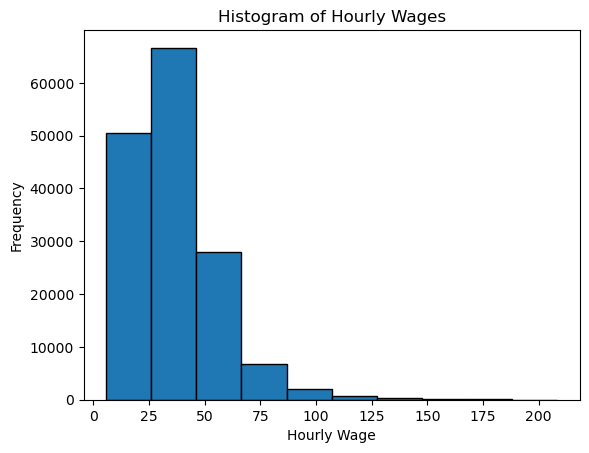

In [591]:
import matplotlib.pyplot as plt

plt.hist(data2['HRLYEARN'], bins=10, edgecolor='black')
plt.xlabel('Hourly Wage')
plt.ylabel('Frequency')
plt.title('Histogram of Hourly Wages')
plt.show()

In [592]:
data2.describe()

,PROV,CMA,AGE_12,SEX,MARSTAT,EDUC,IMMIG,NAICS_21,UHRSMAIN,HRLYEARN,ESTSIZE
count,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000
mean,34.541089,0.368277,6.114628,0.467936,0.505965,3.964940,0.233559,12.977153,3.937985,37.209966,2.302821
std,14.358146,0.482339,2.350304,0.498972,0.499966,1.382313,0.423096,5.008835,0.579008,18.554476,1.053113
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.770000,1.000000
25%,24.000000,0.000000,4.000000,0.000000,0.000000,4.000000,0.000000,9.000000,3.750000,24.000000,1.000000
50%,35.000000,0.000000,6.000000,0.000000,1.000000,4.000000,0.000000,14.000000,4.000000,32.790000,2.000000
75%,47.000000,1.000000,8.000000,1.000000,1.000000,5.000000,0.000000,17.000000,4.000000,46.150000,3.000000
max,59.000000,1.000000,10.000000,1.000000,1.000000,6.000000,1.000000,21.000000,9.900000,208.330000,4.000000


In [593]:
#data2[['UHRSMAIN','AHRSMAIN','UTOTHRS','ATOTHRS','HRSAWAY','PAIDOT','UNPAIDOT']].head()

In [594]:
data2['MARSTAT'].value_counts(normalize=True)*100
#going to create a binary value that shows that one is married or not. 

1    50.596457
0    49.403543
Name: MARSTAT, dtype: float64

In [595]:
data2['PROV'].value_counts()

35    50477
24    30107
59    18112
48    12139
46    10720
47     9534
13     7406
12     6877
10     6717
11     3161
Name: PROV, dtype: int64

In [596]:
'''
data2['EFAMTYPE']=data2['EFAMTYPE'].map({
    1:'Person not in an economic family',
    2:'Dual-earner couple, no children or none under 25',
    3:'Dual-earner couple, youngest child 0 to 17',
    4:'Dual-earner couple, youngest child 18 to 24',
    5:'Single-earner couple, male employed, no children or none under 25',
    6:'Single-earner couple, male employed, youngest child 0 to 17',
    7:'Single-earner couple, male employed, youngest child 18 to 24',
    8:'Single-earner couple, female employed, no children or none under 25',
    9:'Single-earner couple, female employed, youngest child 0 to 17',
    10:'Single-earner couple, female employed, youngest child 18 to 24',
    11:'Non-earner couple, no children or none under 25',
    12:'Non-earner couple, youngest child 0 to 17',
    13:'Non-earner couple, youngest child 18 to 24',
    14:'Lone-parent family, parent employed, youngest child 0 to 17',
    15:'Lone-parent family, parent employed, youngest child 18 to 24',
    16:'Lone-parent family, parent not employed, youngest child 0 to 17',
    17:'Lone-parent family, parent not employed, youngest child 18 to 24',
    18:'Other families'
})
'''

"\ndata2['EFAMTYPE']=data2['EFAMTYPE'].map({\n    1:'Person not in an economic family',\n    2:'Dual-earner couple, no children or none under 25',\n    3:'Dual-earner couple, youngest child 0 to 17',\n    4:'Dual-earner couple, youngest child 18 to 24',\n    5:'Single-earner couple, male employed, no children or none under 25',\n    6:'Single-earner couple, male employed, youngest child 0 to 17',\n    7:'Single-earner couple, male employed, youngest child 18 to 24',\n    8:'Single-earner couple, female employed, no children or none under 25',\n    9:'Single-earner couple, female employed, youngest child 0 to 17',\n    10:'Single-earner couple, female employed, youngest child 18 to 24',\n    11:'Non-earner couple, no children or none under 25',\n    12:'Non-earner couple, youngest child 0 to 17',\n    13:'Non-earner couple, youngest child 18 to 24',\n    14:'Lone-parent family, parent employed, youngest child 0 to 17',\n    15:'Lone-parent family, parent employed, youngest child 18 to 2

In [597]:
profile = ProfileReport(data2, title="Profiling Report")
#profile.to_file("EDA after dropping null attributes.html")
# Generating the profiling report after removing the null attributes

In [598]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155250 entries, 4 to 442573
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PROV      155250 non-null  int64  
 1   CMA       155250 non-null  int64  
 2   AGE_12    155250 non-null  int64  
 3   SEX       155250 non-null  int64  
 4   MARSTAT   155250 non-null  int64  
 5   EDUC      155250 non-null  int64  
 6   IMMIG     155250 non-null  int64  
 7   NAICS_21  155250 non-null  float64
 8   UHRSMAIN  155250 non-null  float64
 9   HRLYEARN  155250 non-null  float64
 10  ESTSIZE   155250 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 18.2 MB


In [599]:
# 5 number summary for HRLYEARN.
Q1 = np.percentile(data2['HRLYEARN'], 25)
Q2 = np.percentile(data2['HRLYEARN'], 50)
Q3 = np.percentile(data2['HRLYEARN'], 75)
min_value = np.min(data2['HRLYEARN'])
max_value = np.max(data2['HRLYEARN'])
IQR = Q3 - Q1
print(Q1,Q2,Q3, min_value,max_value, IQR)

24.0 32.79 46.15 5.77 208.33 22.15


In [600]:
#The outlier fences
lower_bound = 0
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound,upper_bound)

0 79.375


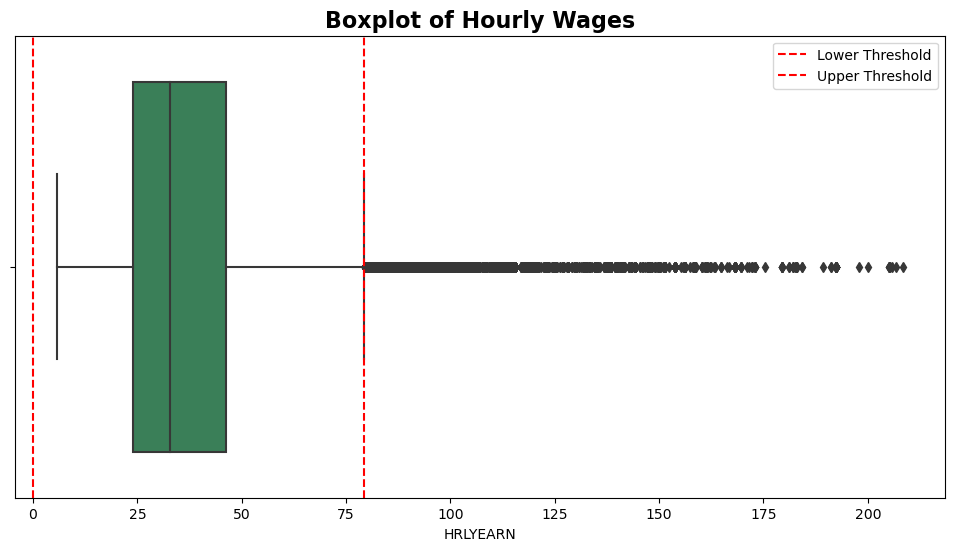

In [601]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data2['HRLYEARN'], color='seagreen')

# Highlighting the outlier thresholds
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Threshold')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Threshold')


# Adding a title and legend
plt.title('Boxplot of Hourly Wages', fontsize=16, fontweight='bold')
plt.legend()

# Show the plot
plt.show()

In [602]:
#checking for outliers in the response variable using IQR
outliers = data2[(data2['HRLYEARN'] < (Q1 - 1.5 * IQR)) | (data2['HRLYEARN'] > (Q3 + 1.5 * IQR))]
outliers.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4685 entries, 44 to 442536
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PROV      4685 non-null   int64  
 1   CMA       4685 non-null   int64  
 2   AGE_12    4685 non-null   int64  
 3   SEX       4685 non-null   int64  
 4   MARSTAT   4685 non-null   int64  
 5   EDUC      4685 non-null   int64  
 6   IMMIG     4685 non-null   int64  
 7   NAICS_21  4685 non-null   float64
 8   UHRSMAIN  4685 non-null   float64
 9   HRLYEARN  4685 non-null   float64
 10  ESTSIZE   4685 non-null   float64
dtypes: float64(4), int64(7)
memory usage: 439.2 KB


In [603]:
#remove the outliers from the data2 dataset
data2 = data2[(data2['HRLYEARN'] >= (Q1 - 1.5 * IQR)) & (data2['HRLYEARN'] <= (Q3 + 1.5 * IQR))]
data2.info()
#this respresnets less than 5% of the data we can remove this. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150565 entries, 4 to 442573
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PROV      150565 non-null  int64  
 1   CMA       150565 non-null  int64  
 2   AGE_12    150565 non-null  int64  
 3   SEX       150565 non-null  int64  
 4   MARSTAT   150565 non-null  int64  
 5   EDUC      150565 non-null  int64  
 6   IMMIG     150565 non-null  int64  
 7   NAICS_21  150565 non-null  float64
 8   UHRSMAIN  150565 non-null  float64
 9   HRLYEARN  150565 non-null  float64
 10  ESTSIZE   150565 non-null  float64
dtypes: float64(4), int64(7)
memory usage: 13.8 MB


In [604]:
reduced_columns=list(data2.columns)
reduced_columns

['PROV',
 'CMA',
 'AGE_12',
 'SEX',
 'MARSTAT',
 'EDUC',
 'IMMIG',
 'NAICS_21',
 'UHRSMAIN',
 'HRLYEARN',
 'ESTSIZE']

In [605]:
data2.isnull().sum()

PROV        0
CMA         0
AGE_12      0
SEX         0
MARSTAT     0
EDUC        0
IMMIG       0
NAICS_21    0
UHRSMAIN    0
HRLYEARN    0
ESTSIZE     0
dtype: int64

In [606]:
missing_values_percent

,Missing Values %
Variables,
PROV,0.0
CMA,0.0
AGE_12,0.0
SEX,0.0
MARSTAT,0.0
EDUC,0.0
IMMIG,0.0
NAICS_21,0.0
UHRSMAIN,0.0


In [607]:
data2.describe()

,PROV,CMA,AGE_12,SEX,MARSTAT,EDUC,IMMIG,NAICS_21,UHRSMAIN,HRLYEARN,ESTSIZE
count,150565.000000,150565.000000,150565.000000,150565.000000,150565.000000,150565.000000,150565.000000,150565.000000,150565.000000,150565.000000,150565.000000
mean,34.441099,0.361219,6.083592,0.473689,0.498828,3.931923,0.232345,12.994414,3.936590,35.205472,2.288739
std,14.387865,0.480356,2.358455,0.499309,0.500000,1.378787,0.422329,5.021012,0.581458,14.371642,1.049401
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.770000,1.000000
25%,24.000000,0.000000,4.000000,0.000000,0.000000,3.000000,0.000000,9.000000,3.750000,24.000000,1.000000
50%,35.000000,0.000000,6.000000,0.000000,0.000000,4.000000,0.000000,14.000000,4.000000,32.000000,2.000000
75%,47.000000,1.000000,8.000000,1.000000,1.000000,5.000000,0.000000,17.000000,4.000000,44.700000,3.000000
max,59.000000,1.000000,10.000000,1.000000,1.000000,6.000000,1.000000,21.000000,9.900000,79.370000,4.000000


In [608]:
data_percent_missing = round(data2.isnull().sum() * 100 / len(data2),2)
missing_values_percent=pd.DataFrame(data_percent_missing, columns=['Missing Values %'])
missing_values_percent=missing_values_percent.rename_axis('Variables')
missing_values_percent

#recreacting the descriptive statistics after removing the outliers and all the unnecessary columns.
data_type_mapping={
'rec_num':'Nominal',
'survyear':'Ordinal',
'survmnth':'Ordinal',
'lfsstat':'Nominal',
'prov':'Nominal',
'cma':'Nominal',
'age_12':'Ordinal',
'age_6':'Ordinal',
'sex':'Nominal',
'marstat':'Nominal',
'educ':'Ordinal',
'mjh':'Nominal',
'everwork':'Nominal',
'ftptlast':'Nominal',
'cowmain':'Nominal',
'immig':'Nominal',
'naics_21':'Nominal',
'noc_10':'Nominal',
'noc_43':'Nominal',
'yabsent':'Nominal',
'wksaway':'Nominal',
'payaway':'Nominal',
'uhrsmain':'Continuous',
'ahrsmain':'Continuous',
'ftptmain':'Nominal',
'utothrs':'Continuous',
'atothrs':'Continuous',
'hrsaway':'Continuous',
'yaway':'Nominal',
'paidot':'Continuous',
'unpaidot':'Continuous',
'xtrahrs':'Continuous',
'whypt':'Nominal',
'tenure':'Discrete',
'prevten':'Discrete',
'hrlyearn':'Continuous',
'union':'Nominal',
'permtemp':'Nominal',
'estsize':'Ordinal',
'firmsize':'Ordinal',
'durunemp':'Discrete',
'flowunem':'Nominal',
'unemftpt':'Nominal',
'whylefto':'Nominal',
'whyleftn':'Nominal',
'durjless':'Discrete',
'availabl':'Nominal',
'lkpubag':'Nominal',
'lkemploy':'Nominal',
'lkrels':'Nominal',
'lkatads':'Nominal',
'lkansads':'Nominal',
'lkothern':'Nominal',
'prioract':'Nominal',
'ynolook':'Nominal',
'tlolook':'Nominal',
'schooln':'Nominal',
'efamtype':'Nominal',
'agyownk':'Ordinal',
'finalwt':'Continuous'}

data_object_mapping={
'rec_num':'Qualitative',
'survyear':'Qualitative',
'survmnth':'Qualitative',
'lfsstat':'Qualitative',
'prov':'Qualitative',
'cma':'Qualitative',
'age_12':'Qualitative',
'age_6':'Qualitative',
'sex':'Qualitative',
'marstat':'Qualitative',
'educ':'Qualitative',
'mjh':'Qualitative',
'everwork':'Qualitative',
'ftptlast':'Qualitative',
'cowmain':'Qualitative',
'immig':'Qualitative',
'naics_21':'Qualitative',
'noc_10':'Qualitative',
'noc_43':'Qualitative',
'yabsent':'Qualitative',
'wksaway':'Qualitative',
'payaway':'Qualitative',
'uhrsmain':'Quantitative',
'ahrsmain':'Quantitative',
'ftptmain':'Qualitative',
'utothrs':'Quantitative',
'atothrs':'Quantitative',
'hrsaway':'Quantitative',
'yaway':'Qualitative',
'paidot':'Quantitative',
'unpaidot':'Quantitative',
'xtrahrs':'Quantitative',
'whypt':'Qualitative',
'tenure':'Quantitative',
'prevten':'Quantitative',
'hrlyearn':'Quantitative',
'union':'Qualitative',
'permtemp':'Qualitative',
'estsize':'Qualitative',
'firmsize':'Qualitative',
'durunemp':'Qualitative',
'flowunem':'Qualitative',
'unemftpt':'Qualitative',
'whylefto':'Qualitative',
'whyleftn':'Qualitative',
'durjless':'Qualitative',
'availabl':'Qualitative',
'lkpubag':'Qualitative',
'lkemploy':'Qualitative',
'lkrels':'Qualitative',
'lkatads':'Qualitative',
'lkansads':'Qualitative',
'lkothern':'Qualitative',
'prioract':'Qualitative',
'ynolook':'Qualitative',
'tlolook':'Qualitative',
'schooln':'Qualitative',
'efamtype':'Qualitative',
'agyownk':'Qualitative',
'finalwt':'Quantitative'}
data_table=data2.columns.to_frame(index=False)
data_table=data_table.rename(columns={0:'Variable Name'})
columns=list(data_table.iloc[:,0] )
data_table_mean_lst=[]
data_table_mode_lst=[]
data_table_median_lst=[]
data_table_min_lst=[]
data_table_max_lst=[]
data_table_std_lst=[]
data_table_object_lst=[]
data_table_dtype_lst=[]

for column in reduced_columns:
    data_table_mean_lst.append(round(data2[column].mean(),2))
    data_table_median_lst.append(round(data2[column].median(),2))
    data_table_min_lst.append(round(data2[column].min(),2))
    data_table_max_lst.append(round(data2[column].max(),2))
    data_table_std_lst.append(round(data2[column].std(),2))
    data_table_object_lst.append(data_object_mapping.get((column.lower())))
    data_table_dtype_lst.append(data_type_mapping.get((column.lower())))

summary_statistics_table=pd.DataFrame(list(zip(columns,data_table_object_lst,data_table_dtype_lst,data_table_mean_lst,data_table_median_lst,data_table_min_lst,data_table_max_lst,data_table_std_lst)),columns=['Variable','Data','Data Type','Mean','Median','Min','Max','Standard Deviation'])
# Creating a table with the summary statistics of the data
#summary_statistics_table
#removing means from non continous and discrete variables
summary_statistics_table["Mean"] = summary_statistics_table.apply(lambda row: row["Mean"] if row["Data Type"].lower() in ["continuous", "discrete"] else None, axis=1)
summary_statistics_table["Mean"] = summary_statistics_table.apply(lambda row: row["Mean"] if row["Data Type"].lower() in ["continuous", "discrete"] else None, axis=1)
summary_statistics_table["Median"] = summary_statistics_table.apply(lambda row: None if row["Data Type"].lower() == "nominal" else row["Median"] , axis=1)
summary_statistics_table=summary_statistics_table.merge(missing_values_percent,left_on='Variable',right_index=True)
summary_statistics_table.sort_values(by=['Missing Values %','Variable'],inplace=True)
summary_statistics_table.reset_index(drop=True,inplace=True)
summary_statistics_table_1=summary_statistics_table[['Variable','Data','Data Type']]
summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))
summary_statistics_table_1=summary_statistics_table_1[['Variable','Description','Data','Data Type']]
summary_statistics_table_1.to_excel('Summary Statistics Table_Figure_3.xlsx',index=False)  
summary_statistics_table_2=summary_statistics_table.drop(columns=['Data','Data Type'],axis=1)
summary_statistics_table_2.to_excel('Summary Statistics Table_Figure_4.xlsx',index=False)  



/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_1470/2993274317.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))


In [609]:
summary_statistics_table_1

,Variable,Description,Data,Data Type
0,AGE_12,Five-year age group of respondent,Qualitative,Ordinal
1,CMA,Nine largest CMAs,Qualitative,Nominal
2,EDUC,Highest educational attainment,Qualitative,Ordinal
3,ESTSIZE,Establishment size,Qualitative,Ordinal
4,HRLYEARN,Usual hourly wages,Quantitative,Continuous
5,IMMIG,Immigrant status,Qualitative,Nominal
6,MARSTAT,Marital status of respondent,Qualitative,Nominal
7,NAICS_21,Industry of main job,Qualitative,Nominal
8,PROV,Province,Qualitative,Nominal
9,SEX,Sex of respondent,Qualitative,Nominal


In [610]:

data2['PROV']=data2['PROV'].map({10:'NL',11:'PE',12:'NS',13:'NB',24:'QC',35:'ON',46:'MB',47:'SK',48:'AB',59:'BC'})

data2['AGE_12']=data2['AGE_12'].map({
    1:'15-19'
    ,2:'20-24'
    ,3:'25-29'
    ,4:'30-34'
    ,5:'35-39'
    ,6:'40-44'
    ,7:'45-49'
    ,8:'50-54'
    ,9:'55-59'
    ,10:'60-64'
    ,11:'65-69'
    ,12:'70+'})

data2['EDUC']=data2['EDUC'].map({
    1:'Some high school'
    ,2:'High school graduate'
    ,3:'Some post-secondary'
    ,4:'Post-secondary certificate or diploma'
    ,5:'Bachelor\'s degree'
    ,6:'Above bachelor\'s degree'})

#data2['COWMAIN']=data2['COWMAIN'].map({1:0,2:1})

data2['NAICS_21']=data2['NAICS_21'].map({
1:'Agriculture'
,2:'Forestry and logging and support activities for forestry'
,3:'Fishing, hunting and trapping'
,4:'Mining, quarrying, and oil and gas extraction'
,5:'Utilities'
,6:'Construction'
,7:'Manufacturing - durable goods'
,8:'Manufacturing - non-durable goods'
,9:'Wholesale trade'
,10:'Retail trade'
,11:'Transportation and warehousing'
,12:'Finance and insurance'
,13:'Real estate and rental and leasing'
,14:'Professional, scientific and technical services'
,15:'Business, building and other support services'
,16:'Educational services'
,17:'Health care and social assistance'
,18:'Information, culture and recreation'
,19:'Accommodation and food services'
,20:'Other services (except public administration)'
,21:'Public administration' 
})

data2['ESTSIZE']=data2['ESTSIZE'].map({
    1:'Less than 20 employees'
    ,2:'20-99 employees'
    ,3:'100-500 employees'
    ,4:'More than 500 employees'})

#data2['PERMTEMP']=data2['PERMTEMP'].map({1:0,2:1,3:2,4:3})

/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_1470/1574330976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['PROV']=data2['PROV'].map({10:'NL',11:'PE',12:'NS',13:'NB',24:'QC',35:'ON',46:'MB',47:'SK',48:'AB',59:'BC'})
/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_1470/1574330976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['AGE_12']=data2['AGE_12'].map({
/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_1470/1574330976.py:17: SettingWithCopyWarning:

In [617]:
data2.head()

,PROV,CMA,AGE_12,SEX,MARSTAT,EDUC,IMMIG,NAICS_21,UHRSMAIN,HRLYEARN,ESTSIZE
4,ON,0,40-44,0,1,Post-secondary certificate or diploma,0,Construction,4.50,28.00,Less than 20 employees
6,QC,1,60-64,0,0,Above bachelor's degree,0,"Professional, scientific and technical services",3.75,24.74,100-500 employees
7,BC,0,25-29,0,0,Post-secondary certificate or diploma,0,Construction,4.00,40.00,20-99 employees
10,BC,0,60-64,0,1,Post-secondary certificate or diploma,0,Educational services,3.50,36.33,20-99 employees
11,QC,0,30-34,1,1,Post-secondary certificate or diploma,0,Manufacturing - durable goods,4.00,34.75,20-99 employees


/Users/hk/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [627]:
data2['HRLYEARN'].head()

4     28.00
6     24.74
7     40.00
10    36.33
11    34.75
Name: HRLYEARN, dtype: float64

In [629]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming data2 is your DataFrame
# Drop the target column from features and separate the target
X = data2.drop(columns=['HRLYEARN'])
y = data2['HRLYEARN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessor for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['PROV', 'AGE_12', 'EDUC', 'NAICS_21', 'ESTSIZE'])
    ],
    remainder='passthrough'  # keep other columns as is
)

# Create the pipeline with preprocessing and regressor steps
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the Random Forest model
pipeline.fit(X_train, y_train)

# Extract the trained Random Forest regressor from the pipeline
rf = pipeline.named_steps['regressor']

# Get the feature names after one-hot encoding
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['PROV', 'AGE_12', 'EDUC', 'NAICS_21', 'ESTSIZE'])
all_feature_names = np.concatenate([encoded_feature_names, X.columns[len(['PROV', 'AGE_12', 'EDUC', 'NAICS_21', 'ESTSIZE'])-1:]])

# Get feature importances from the Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Choose the top N features (e.g., top 10)
top_n = 10
top_features = feature_importances_df.head(top_n)['Feature']

# Reduce the dataset to the top N features
X_reduced = X[top_features]

# Split the reduced data into training and testing sets
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train a new Random Forest model on the reduced dataset
rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

# Evaluate the model
accuracy = rf_reduced.score(X_test_reduced, y_test)
print(f'R^2 score with reduced features: {accuracy:.2f}')

In [611]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
kf=Kfold(n_splits=5,shuffle=True,random_state=42)
cross_val_score(knn,X_train,y_train,cv=kf,scoring='accuracy')

NameError: name 'X' is not defined

In [ ]:
encoder=OneHotEncoder(sparse=False)
preprocessor=ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),[])
        ,('cat',encoder,[])
        ]
    )

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 2 (1833078948.py, line 4)

In [ ]:
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

In [ ]:
param_grid={
"penalty": ["l1", "l2"],
"tol": np.linspace(0.0001, 1.0, 50),
"C": np.linspace(0.1, 1.0, 50),
"class_weight": ["balanced", {0:0.8, 1:0.2}]}

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor)
    ,( 'classifier',KNeighborsClassifier(n_neighbors=5))])